**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_REGION = "encode_chromatin_states"

## Import data

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.cCREs.silencer_rest.bed.gz 
K562.hg38.cCREs.silencer_starr.bed.gz 
K562.hg38.ENCSR365YNI.ENCFF106BGJ.ChromHMM.simplified.bed.gz 
K562.hg38.ENCSR913HQX.ENCFF286VQG.cCREs.simplified.bed.gz 
summary 


In [4]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

description.tsv 
K562.hg38.ENCSR913HQX.ENCFF286VQG.cCREs.label2name.bed.gz 
K562.hg38.ENCSR913HQX.ENCFF286VQG.cCREs.label2name.PLS_ELS.bed.gz 
metadata.label.tsv 


In [5]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(head(dat))

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Name,Name given to a region; Use '.' if no name is assigned.
Group,Type of chromatin states annotaiton
Label,cCREs/ChromHMM labels


In [6]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname = "K562.hg38.ENCSR913HQX.ENCFF286VQG.cCREs.simplified.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_ccres = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd,Name,Group,Label
chr1,10033,10250,EH38E2776516,cCREs,Low-DNase
chr1,10385,10713,EH38E2776517,cCREs,Low-DNase
chr1,16097,16381,EH38E3951272,cCREs,Low-DNase
chr1,17343,17642,EH38E3951273,cCREs,Low-DNase
chr1,29320,29517,EH38E3951274,cCREs,Low-DNase
chr1,66350,66509,EH38E3951275,cCREs,Low-DNase


In [7]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname = "K562.hg38.ENCSR365YNI.ENCFF106BGJ.ChromHMM.simplified.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_chromhmm = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd,Name,Group,Label
chr1,0,16000,Quies,ChromHMM,Quies
chr1,16000,16200,TxWk,ChromHMM,TxWk
chr1,16200,17400,Quies,ChromHMM,Quies
chr1,17400,17600,TxWk,ChromHMM,TxWk
chr1,17600,118400,Quies,ChromHMM,Quies
chr1,118400,120200,Enh1,ChromHMM,Enh1


## Explore data

**Summary of region length**

In [8]:
dat = dat_region_ccres
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)
vec = dat$Length

cat("#{Region} =", nrow(dat), "\n")
summary(vec)

num = quantile(vec, probs=0.9, na.rm=TRUE)
cat("90th percentile", num, "\n")

#{Region} = 2348854 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  150.0   205.0   273.0   267.1   335.0   350.0 

90th percentile 347 


In [9]:
dat = dat_region_chromhmm
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)
vec = dat$Length

cat("#{Region} =", nrow(dat), "\n")
summary(vec)

num = quantile(vec, probs=0.9, na.rm=TRUE)
cat("90th percentile", num, "\n")

#{Region} = 429105 


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     200      400     1200     7197     4400 45489200 

90th percentile 12600 


**Distribution of region length**

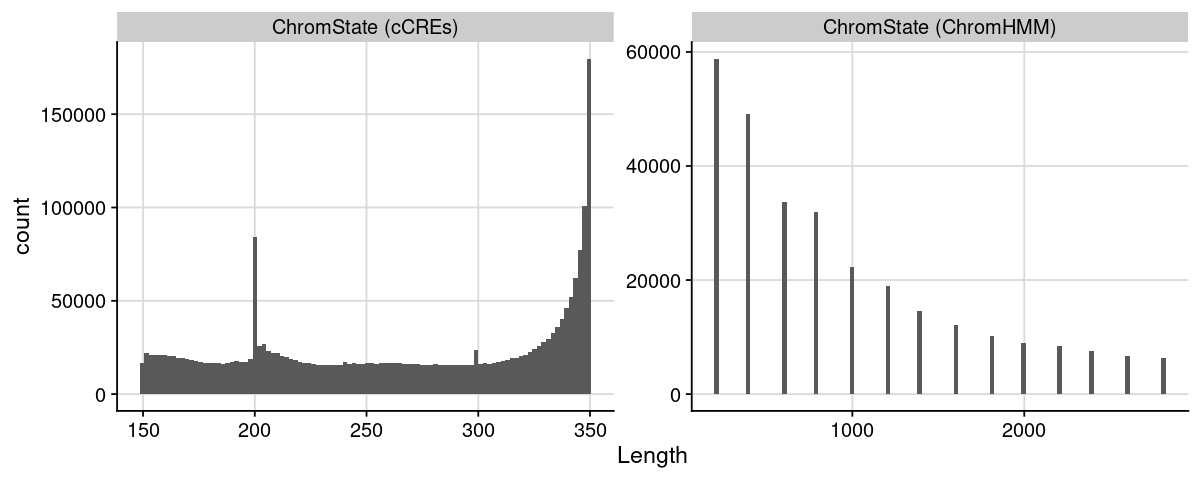

In [10]:
lst = list(
    "ChromState (cCREs)"    = dat_region_ccres,
    "ChromState (ChromHMM)" = dat_region_chromhmm
)

dat  = bind_rows(lst, .id = "Label")
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 3000)

gpt = ggplot(dat, aes(x = Length)) + 
    geom_histogram(bins = 100) + 
    theme_cowplot() + 
    background_grid() + 
    facet_wrap(~Label, scales = "free")

options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

## Save figures

In [11]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 14)
)

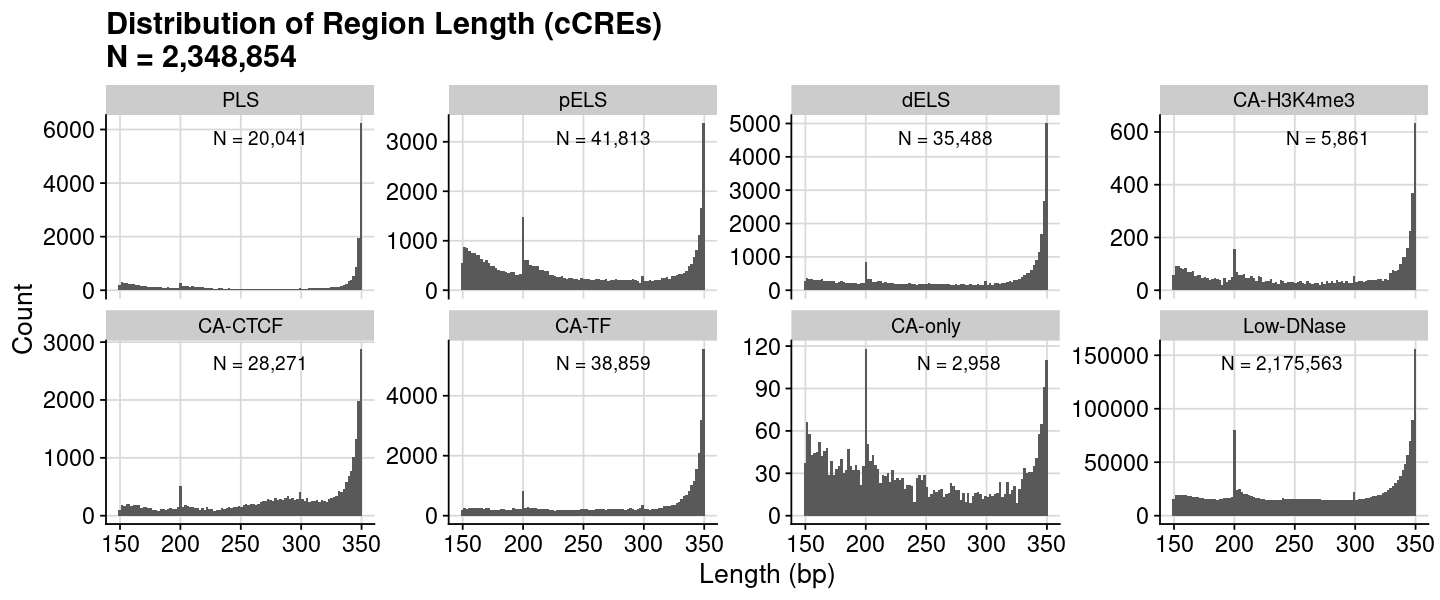

In [12]:
### get data
dat = dat_region_ccres
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

### order the label
vec = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-CTCF", "CA-TF", "CA-only", "Low-DNase")
dat = dat %>% dplyr::mutate(Label = factor(Label, levels = vec))

### compute summary
txt_title = "Distribution of Region Length (cCREs)\n"
txt_title = paste0(txt_title, "N = ", scales::comma(nrow(dat)))
dat_text  = dat %>%
    dplyr::count(Label) %>%
    dplyr::mutate(label_text = paste0("N = ", scales::comma(n)))

### gplot distribution
gpt = ggplot(dat, aes(x = Length)) +
    geom_histogram(bins = 100) + 
    theme_cowplot() + 
    background_grid() +
    labs(x = "Length (bp)", y = "Count", title = txt_title) +
    theme_text +
    facet_wrap(~Label, scale = "free_y", nrow = 2)+
    geom_text(
        data    = dat_text,
        aes(x = Inf, y = Inf, label = label_text),
        hjust   = 1.7,
        vjust   = 2.1,
        size    = 4
    )

### assign plot
gpt_export_ccres = gpt

options(repr.plot.height=5, repr.plot.width=12)
print(gpt)

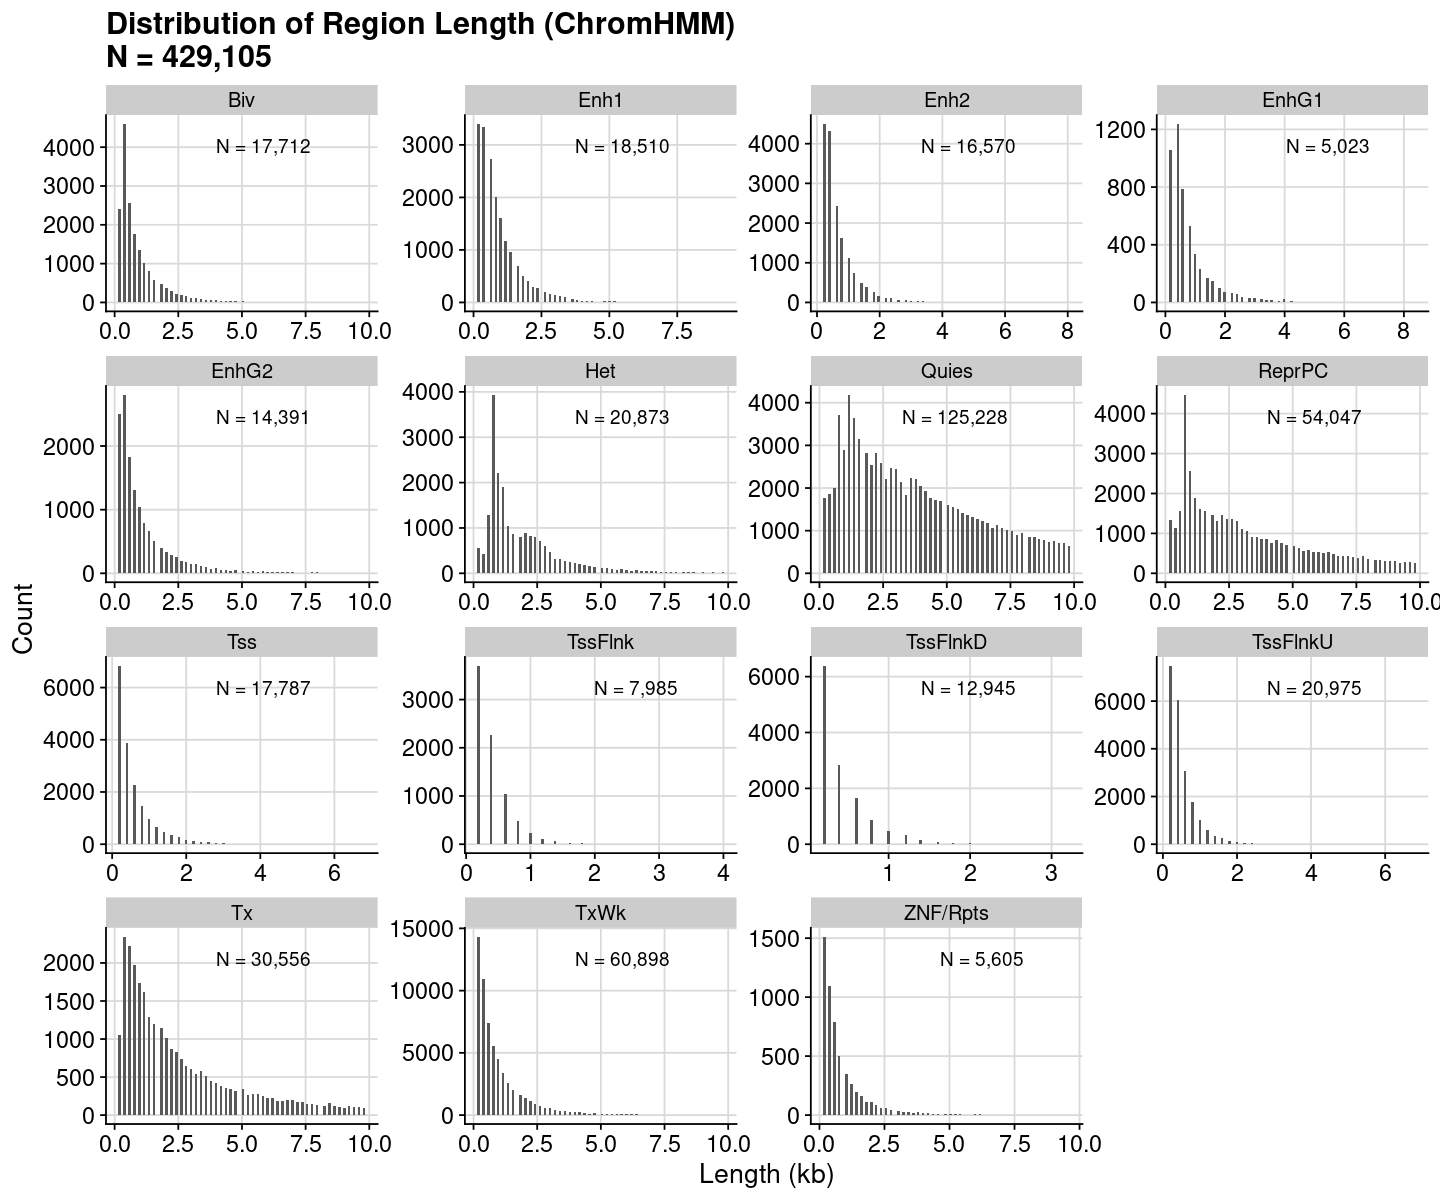

In [17]:
### get data
dat = dat_region_chromhmm
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

### order the label
#vec = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-CTCF", "CA-TF", "CA-only", "Low-DNase")
#dat = dat %>% dplyr::mutate(Label = factor(Label, levels = vec))

### compute summary
txt_title = "Distribution of Region Length (ChromHMM)\n"
txt_title = paste0(txt_title, "N = ", scales::comma(nrow(dat)))
dat_text  = dat %>%
    dplyr::count(Label) %>%
    dplyr::mutate(label_text = paste0("N = ", scales::comma(n)))

### gplot distribution
dat = dat %>% dplyr::filter(Length < 10000)
gpt = ggplot(dat, aes(x = Length/1000)) +
    geom_histogram(bins = 100) + 
    theme_cowplot() + 
    background_grid() +
    labs(x = "Length (kb)", y = "Count", title = txt_title) +
    theme_text +
    facet_wrap(~Label, scale = "free", nrow = 4)+
    geom_text(
        data    = dat_text,
        aes(x = Inf, y = Inf, label = label_text),
        hjust   = 1.7,
        vjust   = 2.7,
        size    = 4
    )

### assign plot
gpt_export_chromhmm = gpt

options(repr.plot.height=10, repr.plot.width=12)
print(gpt)

In [14]:
txt_fdiry = "./"
txt_fname = "fig.region.chromstate_ccres.distribution.region_length.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export_ccres, height = 5, width = 12, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.chromstate_ccres.distribution.region_length.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export_ccres, height = 5, width = 12, units = "in")

In [15]:
txt_fdiry = "./"
txt_fname = "fig.region.chromstate_chromhmm.distribution.region_length.below10k.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export_chromhmm, height = 10, width = 12, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.chromstate_chromhmm.distribution.region_length.below10k.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export_chromhmm, height = 10, width = 12, units = "in")